# COGS 108 Final Project

## Group Members 
- Hao-In Choi: A14726076 
- Lereanne Mendoza: A14696819 
- Victoria Vu: A13797934 
- Mayu Wilson: A13625483 

### Introduction & Background  

#### Research Question 
<i>What factors should aspiring YouTube content creators focus on when trying to increase their popularity by raising their subscriber count?</i> 

#### Hypothesis
As social media platforms such as Instagram and Youtube have become more popular, there has also been an influx in the number of people who earn their living by producing content on these platforms. Our team wants to see what aspiring Youtube creators can do to rise to the ranks of the most popular channels. SocialBlade uses the number of subscribers as a large factor in determining the grade and rank of the channel so we decided that the subscriber count is a good indicator of popularity in general. We believe that the number of subscribers can be predicted by the number of video uploads and the number of video views.

We hypothesize that the number of video uploads and video views will be strongly predictive of the channel's subscriber count: the more videos and video views a channel has, the higher the subscriber count will be. We are also interested in seeing if the other categories are correlated to subscriber count as well.

We think our question is meaningful because it can provide a guideline for uploading videos that content creators can follow when trying to gain more subscribers, whether they are just starting up their channel or well on their way to Youtube fame. We also chose this topic because Youtube and other social media platforms are very immediate to us and it would be fun to see how numbers we see everyday are related to each other.

### Data Description 

The dataset that our team used comes from https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade. 

We are using one data set for this project. This data set was taken off of Kaggle and contains data about the top 5000 YouTube channels which was taken off of a website called SocialBlade, a company which tracks user statistics off of YouTube, Twitter, Instagram, and other social media platforms. The company also allows users to receive feedback for their own videos and join a network of other YouTubers, and it is overall a good resource for someone who is looking to build an online presence. The categories of information about the YouTube channels(the columns) include rank, grade, channel name, number of video uploads, total video views and total number of subscribers. The rank is determined by a number of factors including subscriber count and total views as well as the number of "other channel" widgets. Grade directly corresponds to the rank: the higher your rank, the higher your grade. The two are conferred by SocialBlade.

### Import of Packages

In [1]:
# Import of all packages needed

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import seaborn as sns 
from sklearn import linear_model
import statsmodels.api as sm
import patsy

### Data Cleaning and Pre-Processing 

In [2]:
# Firstly, we are loading the YouTube data and putting everything into a dataframe 
df_youtube = pd.read_csv('data.csv')

In [3]:
df_youtube

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4th,A++,SET India,27323.0,31180559.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433
5,6th,A++,Movieclips,30243.0,17149705.0,16618094724
6,7th,A++,netd müzik,8500.0,11373567.0,23898730764
7,8th,A++,ABS-CBN Entertainment,100147.0,12149206.0,17202609850
8,9th,A++,Ryan ToysReview,1140.0,16082927.0,24518098041
9,10th,A++,Zee Marathi,74607.0,2841811.0,2591830307


Our team noticed that the dataset contained empty values, specifically either under "Video Uploads" or “Subscribers”. Although we tried to look them up manually, the reason why these values were empty is because those corresponding channels may have hid them purposely or removed their affiliation with SocialBlade. With this, we decided to drop these rows. 

However, when checking the data by type, we also noticed that there was a space after each grade. This may affect our visualizations and analysis in that we cannot compare the variables that we want. So we also cleaned up the 'Grade' column.

In [4]:
# Dropping all rows that contained empty values
df_youtube.dropna(inplace = True)

In [5]:
df_youtube.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4th,A++,SET India,27323.0,31180559.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433


In [6]:
# Making sure that type of the grade is string
df_youtube['Grade'].astype(str)

0       A++ 
1       A++ 
2       A++ 
3       A++ 
4       A++ 
5       A++ 
6       A++ 
7       A++ 
8       A++ 
9       A++ 
10       A+ 
11       A+ 
12       A+ 
13       A+ 
14       A+ 
15       A+ 
16       A+ 
18       A+ 
19       A+ 
20       A+ 
21       A+ 
22       A+ 
23       A+ 
24       A+ 
25       A+ 
26       A+ 
27       A+ 
28       A+ 
29       A+ 
30       A+ 
        ... 
4969     B+ 
4970     B+ 
4971     B+ 
4972     B+ 
4973     B+ 
4974     B+ 
4975     B+ 
4976     B+ 
4977     B+ 
4978     B+ 
4979     B+ 
4980     B+ 
4981     B+ 
4982     B+ 
4983     B+ 
4984     B+ 
4985     B+ 
4986     B+ 
4987     B+ 
4988     B+ 
4989     B+ 
4991     B+ 
4992     B+ 
4993     B+ 
4994     B+ 
4995     B+ 
4996     B+ 
4997     B+ 
4998     B+ 
4999     B+ 
Name: Grade, Length: 4610, dtype: object

In [7]:
# Function for cleaning the 'Grade' variable
def standardize_grade(string): 
    string = string.strip()
    return string

In [8]:
df_youtube['Grade'] = df_youtube['Grade'].apply(standardize_grade)
df_youtube['Grade'] == 'A++' # checking if the data is clean

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
        ...  
4969    False
4970    False
4971    False
4972    False
4973    False
4974    False
4975    False
4976    False
4977    False
4978    False
4979    False
4980    False
4981    False
4982    False
4983    False
4984    False
4985    False
4986    False
4987    False
4988    False
4989    False
4991    False
4992    False
4993    False
4994    False
4995    False
4996    False
4997    False
4998    False
4999    False
Name: Grade, Length: 4610, dtype: bool

In [9]:
df_youtube = df_youtube.rename(index=str, columns={"Video Uploads": "video_uploads","Video views": "views"})
df_youtube.head()

,Rank,Grade,Channel name,video_uploads,Subscribers,views
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4th,A++,SET India,27323.0,31180559.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433


### Exploratory Data Visualization 

Firstly, we will visualize the data via a correlation, scatter matrix. This is to see if there are any noticeable correlations between certain variables, such that we can apply certain correlation methods to the right variables. 

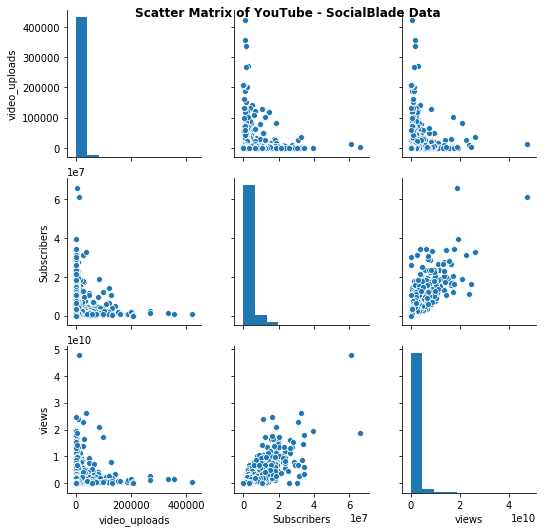

In [10]:
# Creating a correlation scatter matrix in order to check for noticeable correlations 

youtube_scatter = sns.pairplot(df_youtube)
youtube_scatter.fig.suptitle('Scatter Matrix of YouTube - SocialBlade Data', fontweight = 'bold')
plt.show()

Based on the scatter matrix, there appears to be several weak correlations between video uploads and video views, as well as subscribers and video uploads, and vice versa. However, we can see a decently strong correlation between subscribers and video views, and vice versa. Based on this, we are going to create a dataframe specifically for this correlation. 

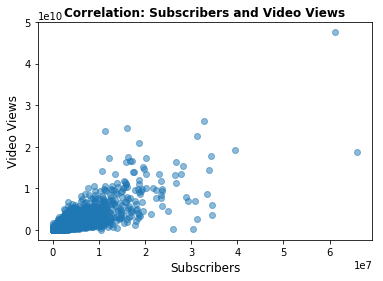

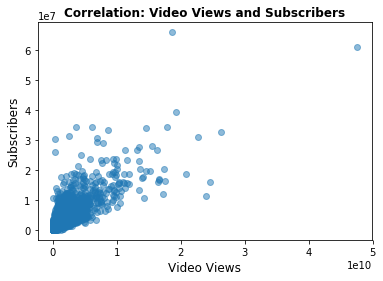

In [11]:
df_subViews = plt.scatter(df_youtube['Subscribers'], df_youtube['views'], alpha = 0.5) 
plt.title('Correlation: Subscribers and Video Views', fontweight = 'bold')
plt.xlabel('Subscribers', fontsize = 12)
plt.ylabel('Video Views', fontsize = 12)
plt.show()

df_viewsSubs = plt.scatter(df_youtube['views'], df_youtube['Subscribers'], alpha = 0.5) 
plt.title('Correlation: Video Views and Subscribers', fontweight = 'bold')
plt.xlabel('Video Views', fontsize = 12)
plt.ylabel('Subscribers', fontsize = 12)
plt.show()

In [12]:
df_subViews = pd.DataFrame(df_youtube, columns = ['Subscribers', 'views'])
df_subViews.corr()

,Subscribers,views
Subscribers,1.000000,0.791241
views,0.791241,1.000000


In [13]:
df_viewsSubs = pd.DataFrame(df_youtube, columns = ['views', 'Subscribers'])
df_viewsSubs.corr()

,views,Subscribers
views,1.000000,0.791241
Subscribers,0.791241,1.000000


To reiterate, both video views and subscribers appear to be directly correlated with each other given the scatter plot as well as the correlation value being near 1. This can mean that video views can potentially predict the number of subscribers that a channel has, and vice versa. 

### Bar Chart & Histograms

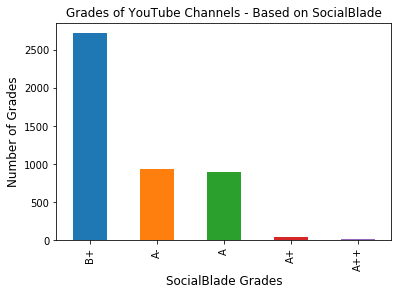

In [14]:
grades = df_youtube['Grade'].value_counts().plot(kind = 'bar')
plt.title('Grades of YouTube Channels - Based on SocialBlade')
plt.xlabel('SocialBlade Grades', fontsize = 12)
plt.ylabel('Number of Grades', fontsize = 12)
plt.show()

In this bar chart, we can see that there are large amount of channels in which SocialBlade has graded with a B+. On the other hand, there are not many channels with a grade of A++ or A+. This puts into perspective that it can be difficult to achieve a channel grade of A++. 

Because of this, our team wanted to see the distribution of each variable to find certain patterns. 

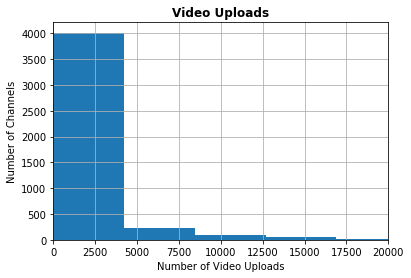

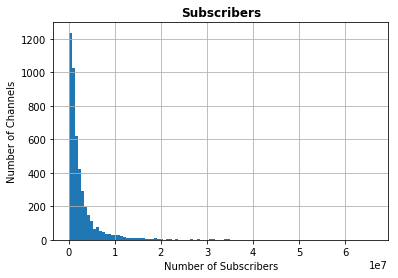

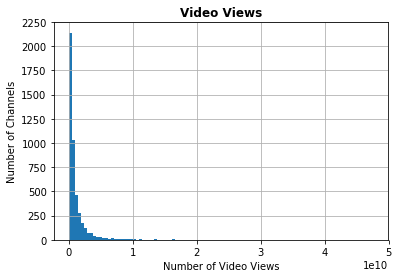

In [15]:
df_uploads = df_youtube['video_uploads'].hist(bins = 100)
plt.title('Video Uploads', fontweight = 'bold')
plt.xlabel('Number of Video Uploads')
plt.ylabel('Number of Channels')
plt.xlim(0,20000)
plt.show()

df_subscribers = df_youtube['Subscribers'].hist(bins = 100)
plt.title('Subscribers', fontweight = 'bold')
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Channels')
plt.show()

df_views = df_youtube['views'].hist(bins = 100)
plt.title('Video Views', fontweight = 'bold')
plt.xlabel('Number of Video Views')
plt.ylabel('Number of Channels')
plt.show()

After visualizing the data, we found that the data variables are all strongly skewed to the left. In order to normalize the data, we decided to take the log for each variable. 

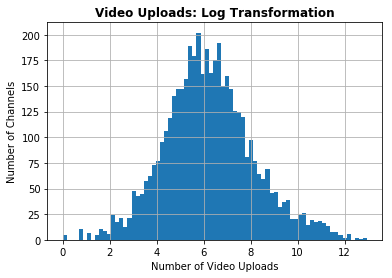

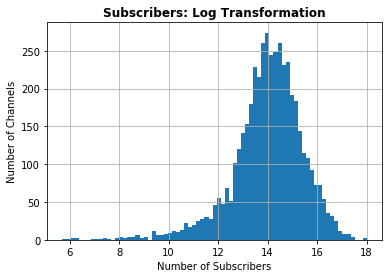

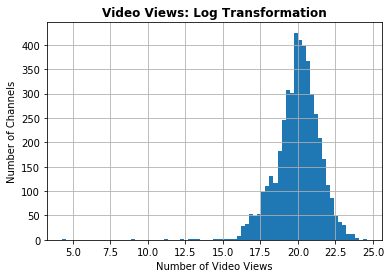

In [16]:
df_uploadLog = np.log(df_youtube['video_uploads']).hist(bins = 75)
plt.title('Video Uploads: Log Transformation', fontweight = 'bold')
plt.xlabel('Number of Video Uploads')
plt.ylabel('Number of Channels')
plt.show()

df_subsLog = np.log(df_youtube['Subscribers']).hist(bins = 75)
plt.title('Subscribers: Log Transformation', fontweight = 'bold')
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Channels')
plt.show() 

df_viewsLog = np.log(df_youtube['views']).hist(bins = 75)
plt.title('Video Views: Log Transformation', fontweight = 'bold')
plt.xlabel('Number of Video Views')
plt.ylabel('Number of Channels')
plt.show()

The data now looks normal now. However, we cannot be too sure. We will further explore this using other tests and visualizations. 

### Exploring the Data

To get a 'feel' for the data and see if there are any inconsistencies or oddities in the data, we will explore the dataset.

### Range of Video Uploads

We want to know the maximum and minimum number of video uploads as well as the range of video uploads.

In [17]:
max_uploads = max(df_youtube['video_uploads'])
print("Maximum Uploads:", max_uploads)
min_uploads = min(df_youtube['video_uploads'])
print("Minimum Uploads:", min_uploads)
r_uploads = max_uploads - min_uploads
print("Range:", r_uploads)

Maximum Uploads: 422326.0
Minimum Uploads: 1.0
Range: 422325.0


### Range of Subscribers

We want to know the maximum and minimum number of subscribers as well as the range of subscribers.

In [18]:
max_sub = max(df_youtube['Subscribers'])
print("Maximum Subscribers:", max_sub)
min_sub = min(df_youtube['Subscribers'])
print("Minimum Subscribers:", min_sub)
r_sub = max_sub - min_sub
print("Range:", r_sub)

Maximum Subscribers: 65995310.0
Minimum Subscribers: 301.0
Range: 65995009.0


### Range of Video Views

We want to know the maximum and minimum number of video views as well as the range of video views.

In [19]:
max_views = max(df_youtube['views'])
print("Maximum Views:", max_views)
min_views = min(df_youtube['views'])
print("Minimum Views:", min_views)
r_views = max_views - min_views
print("Range:", r_views)

Maximum Views: 47548839843
Minimum Views: 75
Range: 47548839768


### Normal Test

Since the data is left skewed, we used log transformations.

In [20]:
df_Log = pd.DataFrame()
df_Log['Video Uploads Log'] = np.log(df_youtube['video_uploads'])
df_Log['Subscribers Log'] = np.log(df_youtube['Subscribers'])
df_Log['Video Views Log'] = np.log(df_youtube['views'])


Using the 'normaltest' function, we test for normality of the distribution. If our data is normal, it is valid for us make the assumption that the data is normal when using other methods and statistical tests.

In [21]:
#Pulling out the different sets of data to test
uploadLog_vals = df_Log['Video Uploads Log'].values
subsLog_vals = df_Log['Subscribers Log'].values
viewsLog_vals = df_Log['Video Views Log'].values

By using the normaltest function, we get the test statistic and p-values for the distribution of uploads, subscribers, and views.

In [22]:
st_uploadLog, p_uploadLog = normaltest(uploadLog_vals)
st_subsLog, p_subsLog = normaltest(subsLog_vals)
st_viewsLog, p_viewsLog = normaltest(viewsLog_vals)

To determine if our data sets are normal, we have decided on an alpha significance value of 0.01. 

If the p value is less than our alpha, then we do not reject the null hypothesis, suggesting that data set is normally distributed.

If the p value is greater than our alpha, then we reject the null hypothesis, suggesting that data set is not normally distributed.

In [23]:
print('Normaltest p_uploadLog p value is: {:1.2e}'. format(p_uploadLog))
print('Normaltest p_subsLog p value is: {:1.2e}'. format(p_subsLog))
print('Normaltest p_viewsLog p value is: {:1.2e} \n'. format(p_viewsLog))

def check_p_val(p_val, alpha):
    if p_val < alpha:
        print('Do not reject null hypothesis. Data is normally distributed.')
        return False 
    else:
        print('Reject null hypothesis. Data is not normally distributed.')
        return True

print("Video Uploads: ")
is_n_upload = check_p_val(p_uploadLog, alpha=0.01)
print("Subscribers: ")
is_n_subs = check_p_val(p_subsLog, alpha=0.01)
print("Video Views: ")
is_n_views = check_p_val(p_viewsLog, alpha=0.01)

Normaltest p_uploadLog p value is: 5.66e-16
Normaltest p_subsLog p value is: 1.83e-203
Normaltest p_viewsLog p value is: 1.09e-219 

Video Uploads: 
Do not reject null hypothesis. Data is normally distributed.
Subscribers: 
Do not reject null hypothesis. Data is normally distributed.
Video Views: 
Do not reject null hypothesis. Data is normally distributed.


Plot of the comparison between the video upload log data and a normal distribution.

C:\Users\Lereanne\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


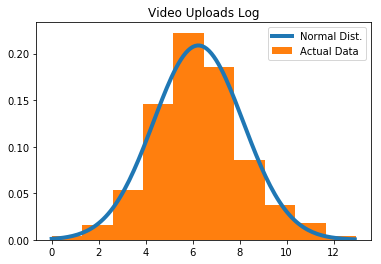

In [24]:
#  This plots a histogram, with the hypothetical normal distribution (with same mean and variance)
xs = np.arange(uploadLog_vals.min(), uploadLog_vals.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(uploadLog_vals), np.std(uploadLog_vals))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(uploadLog_vals, normed=True, label='Actual Data');
plt.title('Video Uploads Log')
plt.legend();

Plot of the comparison between the subscriber log data and a normal distribution.

C:\Users\Lereanne\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


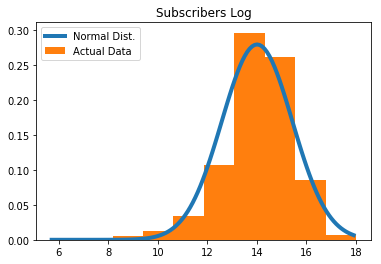

In [25]:
#  This plots a histogram, with the hypothetical normal distribution (with same mean and variance)
xs = np.arange(subsLog_vals.min(), subsLog_vals.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(subsLog_vals), np.std(subsLog_vals))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(subsLog_vals, normed=True, label='Actual Data');
plt.title('Subscribers Log')
plt.legend();

Plot of the comparison between the video view log data and a normal distribution.

C:\Users\Lereanne\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


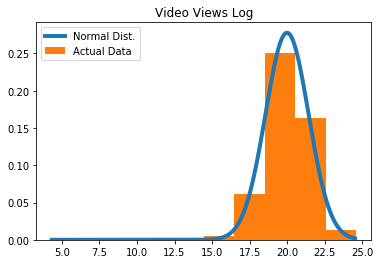

In [26]:
#  This plots a histogram, with the hypothetical normal distribution (with same mean and variance)
xs = np.arange(viewsLog_vals.min(), viewsLog_vals.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(viewsLog_vals), np.std(viewsLog_vals))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(viewsLog_vals, normed=True, label='Actual Data');
plt.title('Video Views Log')
plt.legend();

### Data Analysis & Results

Since the subscribers and views look correlated, we use Pearson's R to see if the relationship is significant.

In [27]:
corr_result = stats.pearsonr(df_youtube['Subscribers'],df_youtube['views'])
print("R:", corr_result[0])
print("p-value:", corr_result[1])

R: 0.7912411514219986
p-value: 0.0


As the p-value is smaller than 0.05, it is most likely even smaller than 0.01, considering that the result is 0.0. We can then conclude that the they have a significantly strong correlation.

#### Predicting number of subscribers based on other factors

We will try to use a different regression model to see what are some good predictors for the subscribers to further come up with efficient conclusions.

In [28]:
outcome_1, predictors_1 = patsy.dmatrices('Subscribers ~ video_uploads', df_youtube)
mod1 = sm.OLS(outcome_1, predictors_1)
res1 = mod1.fit()

In [29]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:            Subscribers   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5950
Date:                Thu, 21 Mar 2019   Prob (F-statistic):              0.441
Time:                        19:51:52   Log-Likelihood:                -76536.
No. Observations:                4610   AIC:                         1.531e+05
Df Residuals:                    4608   BIC:                         1.531e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.611e+06   5.94e+04     43.989

The p-value is 0.441. 0.441 is > 0.05, which indicates that there is no significant relationship between video uploads and number of subscribers. 

C:\Users\Lereanne\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


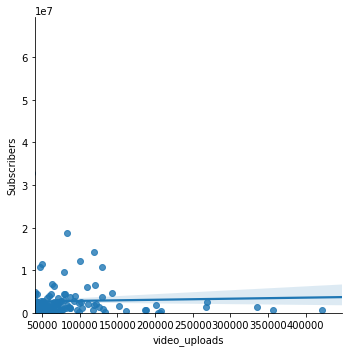

In [30]:
fig=sns.lmplot(x='video_uploads',y='Subscribers',data=df_youtube,fit_reg=True) 
fig.set(xlim=(40000, None))
fig.set(ylim=(40000,None))
plt.show()

Next, we will try to predict subscribers using video views.

In [31]:
outcome_2, predictors_2 = patsy.dmatrices('Subscribers ~ views', df_youtube)
mod2 = sm.OLS(outcome_2, predictors_2)
res2 = mod2.fit()

In [32]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:            Subscribers   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     7715.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:51:59   Log-Likelihood:                -74269.
No. Observations:                4610   AIC:                         1.485e+05
Df Residuals:                    4608   BIC:                         1.486e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.115e+05   4.04e+04     22.575      0.0

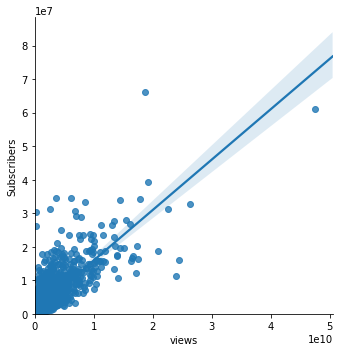

In [33]:
fig=sns.lmplot(x='views',y='Subscribers',data=df_youtube,fit_reg=True) 
fig.set(xlim=(40000, None))
fig.set(ylim=(40000,None))
plt.show()

According to the analysis above, the p-value for the number of video views is 0. With this, we know that this is a good predictor of subscibers. Furthermore, this also matches the result we got from the previous correlation.

In [34]:
outcome_3, predictors_3 = patsy.dmatrices('Subscribers ~ video_uploads + views', df_youtube)
mod3 = sm.OLS(outcome_3, predictors_3)
res3 = mod3.fit()

In [35]:
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:            Subscribers   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     3913.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:52:05   Log-Likelihood:                -74248.
No. Observations:                4610   AIC:                         1.485e+05
Df Residuals:                    4607   BIC:                         1.485e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.534e+05   4.07e+04     23.420

Interestingly, when we included both the number of video views and video uploads, the p-values are 0. Perhaps this is because of the interactions between the number of video views and video uploads. Knowing this, we can conclude that both of these variables are important to predict the number of subscribers.

#### T-Test

Based on our hypothesis, we also wonder if there are any differences between the mean of subscribers, video uploads, and video views for the channels in different grades. If these do have some differences, they can become a guideline for aspiring creators when trying to increase their popularity and online presence. 

In [36]:
sub_App = np.log(df_youtube[df_youtube['Grade'] == 'A++']['Subscribers'].values)
sub_Ap =  np.log(df_youtube[df_youtube['Grade'] == 'A+']['Subscribers'].values)
sub_A =  np.log(df_youtube[df_youtube['Grade'] == 'A']['Subscribers'].values)
sub_Am =  np.log(df_youtube[df_youtube['Grade'] == 'A-']['Subscribers'].values)
sub_Bp =  np.log(df_youtube[df_youtube['Grade'] == 'B+']['Subscribers'].values)

In [37]:
avg_sub_App = int(sub_App.mean())
avg_sub_Ap = int(sub_Ap.mean())
avg_sub_A = int(sub_A.mean())
avg_sub_Am = int(sub_Am.mean())
avg_sub_Bp = int(sub_Bp.mean())

In [38]:
print("Average subscribers in Grade A++ channel  ", avg_sub_App)
print("Average subscribers in Grade A+ channel   ", avg_sub_Ap)
print("Average subscribers in Grade A channel     ", avg_sub_A)
print("Average subscribers in Grade A- channel    ", avg_sub_Am)
print("Average subscribers in Grade B- channel    ", avg_sub_Bp)

Average subscribers in Grade A++ channel   16
Average subscribers in Grade A+ channel    15
Average subscribers in Grade A channel      14
Average subscribers in Grade A- channel     14
Average subscribers in Grade B- channel     13


In [39]:
up_App = np.log(df_youtube[df_youtube['Grade'] == 'A++']['video_uploads'].values)
up_Ap =  np.log(df_youtube[df_youtube['Grade'] == 'A+']['video_uploads'].values)
up_A =  np.log(df_youtube[df_youtube['Grade'] == 'A']['video_uploads'].values)
up_Am =  np.log(df_youtube[df_youtube['Grade'] == 'A-']['video_uploads'].values)
up_Bp =  np.log(df_youtube[df_youtube['Grade'] == 'B+']['video_uploads'].values)

In [40]:
avg_up_App = int(up_App.mean())
avg_up_Ap = int(up_Ap.mean())
avg_up_A = int(up_A.mean())
avg_up_Am = int(up_Am.mean())
avg_up_Bp = int(up_Bp.mean())

In [41]:
print("Average video uploads in Grade A++ channel  ", avg_up_App)
print("Average video uploads in Grade A+ channel   ", avg_up_Ap)
print("Average video uploads in Grade A channel     ", avg_up_A)
print("Average video uploads in Grade A- channel    ", avg_up_Am)
print("Average video uploads in Grade B+ channel    ", avg_up_Bp)

Average video uploads in Grade A++ channel   9
Average video uploads in Grade A+ channel    7
Average video uploads in Grade A channel      6
Average video uploads in Grade A- channel     6
Average video uploads in Grade B+ channel     6


In [42]:
view_App = np.log(df_youtube[df_youtube['Grade'] == 'A++']['views'].values)
view_Ap =  np.log(df_youtube[df_youtube['Grade'] == 'A+']['views'].values)
view_A =  np.log(df_youtube[df_youtube['Grade'] == 'A']['views'].values)
view_Am =  np.log(df_youtube[df_youtube['Grade'] == 'A-']['views'].values)
view_Bp =  np.log(df_youtube[df_youtube['Grade'] == 'B+']['views'].values)

In [43]:
avg_view_App = int(view_App.mean())
avg_view_Ap = int(view_Ap.mean())
avg_view_A = int(view_A.mean())
avg_view_Am = int(view_Am.mean())
avg_view_Bp = int(view_Bp.mean())

In [44]:
print("Average views in Grade A++ channel  ", avg_view_App)
print("Average views in Grade A+ channel    ", avg_view_Ap)
print("Average views in Grade A channel     ", avg_view_A)
print("Average views in Grade A- channel    ", avg_view_Am)
print("Average views in Grade B+ channel     ", avg_view_Bp)

Average views in Grade A++ channel   23
Average views in Grade A+ channel     22
Average views in Grade A channel      21
Average views in Grade A- channel     20
Average views in Grade B+ channel      19


Based on the cells above, it seems that the statistics for each variable are similar to each other based on the channel grades. With this, we will conduct a t-test, along with an analysis of variance (ANOVA) to ensure that they are. 

In [45]:
df_youtube.index = df_Log.index
df_Log['Grade'] = df_youtube['Grade']

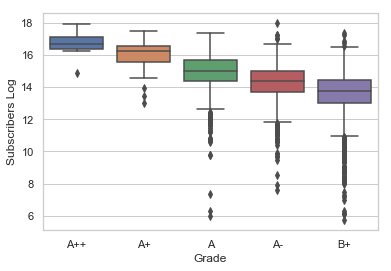

In [46]:
# We first start with the number of subscribers
sns.set(style = "whitegrid")
ax = sns.boxplot(x = 'Grade', y = 'Subscribers Log', data = df_Log )

In [47]:
# ANOVA
App = df_Log[df_Log['Grade'] == "A++"]['Subscribers Log']
Ap = df_Log[df_Log['Grade'] == "A+"]['Subscribers Log']
A = df_Log[df_Log['Grade'] == "A"]['Subscribers Log']
Am = df_Log[df_Log['Grade'] == "A-"]['Subscribers Log']
Bp = df_Log[df_Log['Grade'] == "B+"]['Subscribers Log']

stats.f_oneway(App, Ap, A, Am, Bp)


F_onewayResult(statistic=219.55648441291584, pvalue=1.055513046200873e-172)

The test output provides an F-statistic of 219.56 and p-value that is smaller than 0.05. This indicate that there is a significant difference between the means of subscibers for each group. 

However, we think that can be worth investigating t-statistics between the different pairs of data. 

In [48]:
grade = ['A++','A+','A','A-','B+']
grade_pairs = []

for grade1 in range(4):
  for grade2 in range(grade1+1, 5):
    grade_pairs.append((grade[grade1],grade[grade2]))
    
for grade1, grade2 in grade_pairs:
  print(grade1, grade2)
  print(stats.ttest_ind(df_Log[df_Log['Grade'] == grade1]['Subscribers Log'], df_Log[df_Log['Grade'] == grade2]['Subscribers Log']))
    

A++ A+
Ttest_indResult(statistic=2.1710521489509786, pvalue=0.03490257453144251)
A++ A
Ttest_indResult(statistic=4.4928155886917915, pvalue=7.938728303052824e-06)
A++ A-
Ttest_indResult(statistic=6.204012293022035, pvalue=8.208667737426439e-10)
A++ B+
Ttest_indResult(statistic=7.138834833690983, pvalue=1.2014723764549611e-12)
A+ A
Ttest_indResult(statistic=5.195617645448835, pvalue=2.5051439270871314e-07)
A+ A-
Ttest_indResult(statistic=8.566306848802855, pvalue=4.105193691889981e-17)
A+ B+
Ttest_indResult(statistic=10.872357953646752, pvalue=5.457355257139881e-27)
A A-
Ttest_indResult(statistic=11.462504893858384, pvalue=1.9872073020161612e-29)
A B+
Ttest_indResult(statistic=25.909833956194422, pvalue=6.4086421091810614e-136)
A- B+
Ttest_indResult(statistic=13.368897991185515, pvalue=7.783898409242252e-40)


The p-values of all pairs are smaller than 0.05, and the results matches the results of ANOVA. 

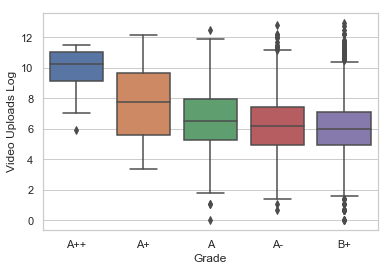

In [49]:
# Then we look at the video uploads
sns.set(style = "whitegrid")
ax = sns.boxplot(x = 'Grade', y = 'Video Uploads Log', data = df_Log)

In [50]:
# Analysis of Variance Test (ANOVA)
App = df_Log[df_Log['Grade'] == "A++"]['Video Uploads Log']
Ap = df_Log[df_Log['Grade'] == "A+"]['Video Uploads Log']
A = df_Log[df_Log['Grade'] == "A"]['Video Uploads Log']
Am = df_Log[df_Log['Grade'] == "A-"]['Video Uploads Log']
Bp = df_Log[df_Log['Grade'] == "B+"]['Video Uploads Log']

stats.f_oneway(App,Ap,A,Am,Bp)


F_onewayResult(statistic=31.094269733205007, pvalue=1.3784980560255228e-25)

The test output provides an F-statistic of 31.09 and a p-value that is smaller than 0.05. This indicates that there is a significant difference between the means of subscibers for each group. 

Again, we feel that it is worth investigating the t-statistics between the different pairs of data. 

In [51]:
grade = ['A++','A+','A','A-','B+']
grade_pairs = []

for grade1 in range(4):
  for grade2 in range(grade1+1, 5):
    grade_pairs.append((grade[grade1],grade[grade2]))
    
for grade1, grade2 in grade_pairs:
  print(grade1, grade2)
  print(stats.ttest_ind(df_Log[df_Log['Grade'] == grade1]['Video Uploads Log'], df_Log[df_Log['Grade'] == grade2]['Video Uploads Log']))
    

A++ A+
Ttest_indResult(statistic=2.4546282645103075, pvalue=0.0177794692188958)
A++ A
Ttest_indResult(statistic=4.752682066461283, pvalue=2.3340031402412498e-06)
A++ A-
Ttest_indResult(statistic=5.515796404035093, pvalue=4.477495238493913e-08)
A++ B+
Ttest_indResult(statistic=6.198802632218939, pvalue=6.550082983200187e-10)
A+ A
Ttest_indResult(statistic=3.15568289502338, pvalue=0.0016524412679597188)
A+ A-
Ttest_indResult(statistic=4.409550555049186, pvalue=1.1504648273310405e-05)
A+ B+
Ttest_indResult(statistic=5.511315353851226, pvalue=3.8906590078056773e-08)
A A-
Ttest_indResult(statistic=3.9009979168948976, pvalue=9.924885793431969e-05)
A B+
Ttest_indResult(statistic=8.212593794084228, pvalue=2.9801766074689596e-16)
A- B+
Ttest_indResult(statistic=3.371890244885524, pvalue=0.0007542865253803218)


The p-values for all pairs are smaller than 0.05, and the results matches the results of ANOVA. 

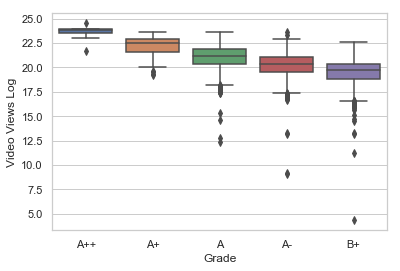

In [52]:
# Lastly, we will look at the number of video views
sns.set(style = "whitegrid")
ax = sns.boxplot(x = 'Grade', y = 'Video Views Log', data = df_Log )

In [53]:
# Analysis of Variance Test (ANOVA)
App = df_Log[df_Log['Grade'] == "A++"]['Video Views Log']
Ap = df_Log[df_Log['Grade'] == "A+"]['Video Views Log']
A = df_Log[df_Log['Grade'] == "A"]['Video Views Log']
Am = df_Log[df_Log['Grade'] == "A-"]['Video Views Log']
Bp = df_Log[df_Log['Grade'] == "B+"]['Video Views Log']

stats.f_oneway(App,Ap,A,Am,Bp)


F_onewayResult(statistic=286.37128102149376, pvalue=3.3813400789974393e-220)

The test output provides an F-statistic of 286.37 and a p-value that is smaller than 0.05. This indicates that there is a significant difference between the means of subscibers for each group. 

Once again, we believe that it is worth investigating the t-statistics between the different pairs of data. 

In [54]:
grade = ['A++','A+','A','A-','B+']
grade_pairs = []

for grade1 in range(4):
  for grade2 in range(grade1+1, 5):
    grade_pairs.append((grade[grade1],grade[grade2]))
    
for grade1, grade2 in grade_pairs:
  print(grade1, grade2)
  print(stats.ttest_ind(df_Log[df_Log['Grade'] == grade1]['Video Views Log'], df_Log[df_Log['Grade'] == grade2]['Video Views Log']))
    

A++ A+
Ttest_indResult(statistic=3.7299101163672335, pvalue=0.0005061391793805576)
A++ A
Ttest_indResult(statistic=6.267666422930265, pvalue=5.664355436827507e-10)
A++ A-
Ttest_indResult(statistic=7.9513625518392175, pvalue=5.221658302260398e-15)
A++ B+
Ttest_indResult(statistic=10.071934500714548, pvalue=1.877958607863597e-23)
A+ A
Ttest_indResult(statistic=5.057400896374493, pvalue=5.114220359309188e-07)
A+ A-
Ttest_indResult(statistic=8.73646611895839, pvalue=1.0272867683004943e-17)
A+ B+
Ttest_indResult(statistic=12.608269781422303, pvalue=1.7728564078692785e-35)
A A-
Ttest_indResult(statistic=13.796658967705097, pvalue=2.837613117496991e-41)
A B+
Ttest_indResult(statistic=30.71391108575447, pvalue=2.757365185836277e-184)
A- B+
Ttest_indResult(statistic=13.5094763463376, pvalue=1.2734979434508685e-40)


The p-values of all pairs are smaller than 0.05, and the results matches the results of ANOVA. 

After fitting the linear model, the ANOVA test, and t-test, we found that all the results suggest that creators on YouTube must make an effort and do their best on uploading more videos, earning more video views, and growing their subscriber count in order to grow their popularity and online presence. 

### Privacy and Ethics Consideration 

This project does not violate any policy or privacy because the data was taken from YouTube and SocialBlade, both public sources of information. Furthermore, the data does not contain any personal information such as the user's full name, address, or telephone number, or anything that would be subject to removal in the Safe Harbour Method. The YouTube channel name may contain the user's name but this is information that the user agrees to publicly release when they set the name when making the account. The data also does not violate any of YouTube's own privacy regulations:

- Image or voice
- Full name
- Financial information
- Contact information
- Other personally identifiable information

There may be some bias in the way that SocialBlade assigns the rankings and grades to each of the channels since they are calculated through their own methods, but seeing as SocialBlade is a well established resource that aims to provide user statistics for YouTube users themselves, it is highly unlikely that they use biased methods.



### Conclusion and Discussion

Our data shows that subscriber count and video views are highly correlated to each other. This makes sense because we can assume that a great number of subscribers watch the videos of the channel that they are subscribed to. Therefore the more subscribers that a channel has, the more their videos are being watched increasing the number of total video views. This also goes the other way around: If there are less subscribers, there are less people who are surely to watch the videos that the channel uploads, so there are less total video views.
We also found that the subscriber count and the number of video uploads are negatively correlated, meaning that the channels with fewer videos are more likely to have more subscribers than channels with many videos. This may be because the videos that the channels with the most subscribers upload are better in quality than those uploaded by channels that mass produce their videos. However, this is a tentative theory and will have to be tested in the future.

To new and continuing Youtube content creators, we suggest that your goal should not be to upload as many videos as possible. If you are creating good content, the subscribers and the views should follow.

Our answer to our research question is limited by the data set in that there are not enough columns in the data set. In other words, there are not enough features about Youtube channels present to thoroughly provide information about all the factors that influence subscriber count. Clearly, there are other factors such as genre and average video length that have a strong impact on subscriber count, but this data would have to be gathered elsewhere.
Another limitation is that since our data contains only the top 5000 users, we can only gather information from channels ranked B+ to A++. Since newer and less popular content creators are more likely to have a lower rank, it is not possible to gather and analyze information that specifically pertains only to this type of content creator.